In [1]:
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from scipy.stats import linregress
from pprint import pprint
from APIKEY import eia_api

output_data_file = "whatevername.csv"


In [2]:
url = "http://api.eia.gov/series/?api_key="

query_url = url + eia_api + "&series_id=PET.EMM_EPM0_PTE_Y44HO_DPG.W"

articles = requests.get(query_url).json()
#articles_list = articles["response"]["docs"]

print(json.dumps(articles, indent=4, sort_keys=True))



{
    "request": {
        "command": "series",
        "series_id": "PET.EMM_EPM0_PTE_Y44HO_DPG.W"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "20200309",
                    2.145
                ],
                [
                    "20200302",
                    2.189
                ],
                [
                    "20200224",
                    2.203
                ],
                [
                    "20200217",
                    2.15
                ],
                [
                    "20200210",
                    2.191
                ],
                [
                    "20200203",
                    2.227
                ],
                [
                    "20200127",
                    2.269
                ],
                [
                    "20200120",
                    2.286
                ],
                [
                    "20200113",
   

In [3]:
articles["series"][0]["data"]

[['20200309', 2.145],
 ['20200302', 2.189],
 ['20200224', 2.203],
 ['20200217', 2.15],
 ['20200210', 2.191],
 ['20200203', 2.227],
 ['20200127', 2.269],
 ['20200120', 2.286],
 ['20200113', 2.307],
 ['20200106', 2.309],
 ['20191230', 2.302],
 ['20191223', 2.258],
 ['20191216', 2.264],
 ['20191209', 2.259],
 ['20191202', 2.261],
 ['20191125', 2.276],
 ['20191118', 2.272],
 ['20191111', 2.292],
 ['20191104', 2.259],
 ['20191028', 2.277],
 ['20191021', 2.309],
 ['20191014', 2.328],
 ['20191007', 2.355],
 ['20190930', 2.392],
 ['20190923', 2.435],
 ['20190916', 2.364],
 ['20190909', 2.373],
 ['20190902', 2.38],
 ['20190826', 2.416],
 ['20190819', 2.458],
 ['20190812', 2.473],
 ['20190805', 2.518],
 ['20190729', 2.542],
 ['20190722', 2.57],
 ['20190715', 2.556],
 ['20190708', 2.507],
 ['20190701', 2.462],
 ['20190624', 2.425],
 ['20190617', 2.47],
 ['20190610', 2.538],
 ['20190603', 2.601],
 ['20190527', 2.63],
 ['20190520', 2.663],
 ['20190513', 2.674],
 ['20190506', 2.697],
 ['20190429', 2

In [4]:
price_list_df = pd.DataFrame(articles["series"][0]["data"])
price_list_df.head()

,0,1
0,20200309,2.145
1,20200302,2.189
2,20200224,2.203
3,20200217,2.150
4,20200210,2.191


In [5]:
price_list_df = pd.DataFrame(articles["series"][0]["data"])
price_list_df.tail()

,0,1
1027,20000703,1.592
1028,20000626,1.602
1029,20000619,1.591
1030,20000612,1.557
1031,20000605,1.529


In [6]:
#Our dates sets are from 06/05/2000 to 03/09/2020

dow_path = "DJI.CSV"
dow_df = pd.read_csv(dow_path)
dow_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-06-05,10793.110352,10863.000000,10588.290039,10614.059570,10614.059570,787950000
1,2000-06-12,10615.120117,10763.700195,10449.299805,10449.299805,10449.299805,867580000
2,2000-06-19,10448.400391,10597.440430,10335.459961,10404.750000,10404.750000,884540000
3,2000-06-26,10403.690430,10620.419922,10336.160156,10447.889648,10447.889648,898630000
4,2000-07-03,10450.360352,10658.250000,10393.089844,10635.980469,10635.980469,535120000


In [14]:
#Defining the oil price dataframe
oil_price_df = price_list_df.rename(columns={0:"Date", 1:"Oil Price"})
oil_price_df.head()
oil_price_df.loc[:,"Date"]
oil_price_df["Date"]=pd.to_datetime(oil_price_df.loc[:,"Date"])
oil_price_df.head()

,Date,Oil Price
0,2020-03-09,2.145
1,2020-03-02,2.189
2,2020-02-24,2.203
3,2020-02-17,2.150
4,2020-02-10,2.191


In [16]:
#Defining the dow index dataframe and extracting data of interest
dow_df=dow_df[["Date","Close"]]
dow_df=dow_df.rename(columns={"Close":"Dow Index"})
dow_df["Date"]=pd.to_datetime(dow_df.loc[:,"Date"])
dow_df.head()

,Date,Dow Index
0,2000-06-05,10614.059570
1,2000-06-12,10449.299805
2,2000-06-19,10404.750000
3,2000-06-26,10447.889648
4,2000-07-03,10635.980469


In [18]:
#Merging all data for plotting
combined_data = pd.merge(oil_price_df,dow_df, on='Date')
combined_data.tail()

,Date,Oil Price,Dow Index
1026,2000-07-03,1.592,10635.980469
1027,2000-06-26,1.602,10447.889648
1028,2000-06-19,1.591,10404.750000
1029,2000-06-12,1.557,10449.299805
1030,2000-06-05,1.529,10614.059570


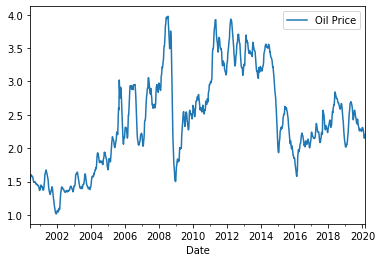

In [19]:
#Plot oil price over time
combined_data.plot(x='Date', y='Oil Price', kind='line')
plt.show()

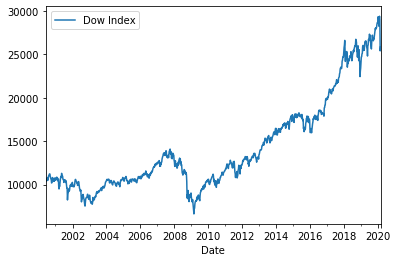

In [20]:
#Plot dow over time
combined_data.plot(x='Date', y='Dow Index', kind='line')
plt.show()

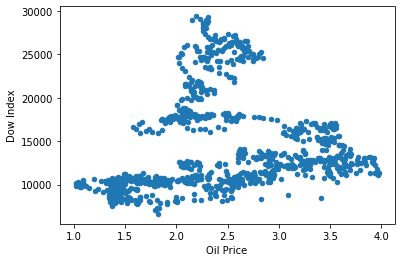

In [21]:
#Plot dow - oil price correlation
combined_data.plot(x='Oil Price', y='Dow Index', kind='scatter')
plt.show()

In [22]:
#Determining the minimum Dow Jones index
combined_data.describe()
combined_data.loc[]

,Oil Price,Dow Index
count,1031.000000,1031.000000
mean,2.406954,14247.714130
std,0.722205,5394.581034
min,1.015000,6626.939941
25%,1.841000,10416.540039
50%,2.335000,12231.110352
75%,2.923000,17272.475586
max,3.977000,29398.080078


In [28]:
#Determining the date for minimum Dow Jones index
combined_data[combined_data["Dow Index"]==6626.939941]
date_benchmark="2009-03-02"

In [31]:
#filtering only data before crisis
data_before_crisis_df=combined_data[combined_data["Date"]<=date_benchmark]
data_before_crisis_df.head()


,Date,Oil Price,Dow Index
574,2009-03-02,1.821,6626.939941
575,2009-02-23,1.794,7062.930176
576,2009-02-16,1.832,7365.669922
577,2009-02-09,1.837,7850.410156
578,2009-02-02,1.806,8280.589844


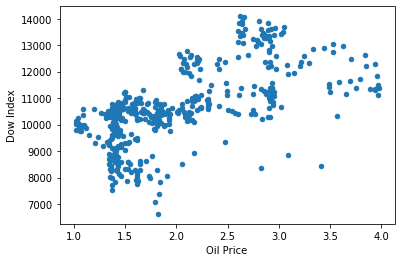

In [44]:
#Plot dow - oil price correlation
data_before_crisis_df.plot(x='Oil Price', y='Dow Index', kind='scatter')
x_values = data_before_crisis_df['Oil Price']
y_values = data_before_crisis_df['Dow Index']
plt.show()

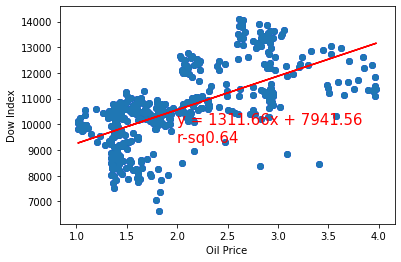

In [45]:
#Determine regression statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10000),fontsize=15,color="red")

#Annotate the rvalue
r_sq="r-sq"+str(round(rvalue,2))
plt.annotate(r_sq,(2,9300),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Oil Price')
plt.ylabel('Dow Index')
plt.show()